In [1]:
#%matplotlib notebook
import os
import numpy as np
import random
import cv2
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import call
from sklearn.neighbors.kde import KernelDensity
from mpl_toolkits import mplot3d
from sklearn.decomposition import PCA
import pandas as pd
sns.set(color_codes=True)
from utilities import *

## Loading the training set

In [2]:

# path for the training set directory
stage1_train_path = '/Users/jonathansaragosti/Documents/GitHub/Python/Kaggle/2018 Data Science Bowl/nuclei/data/stage1_train/'
# Check how many images there are in total in the training set
dataset = DataSet(stage1_train_path)


###Example
Pick a random diretcory and display:
- the image
- the labelled image
- the histogram equalized image


In [3]:
n = random.choice(range(len(dataset.subdir)))

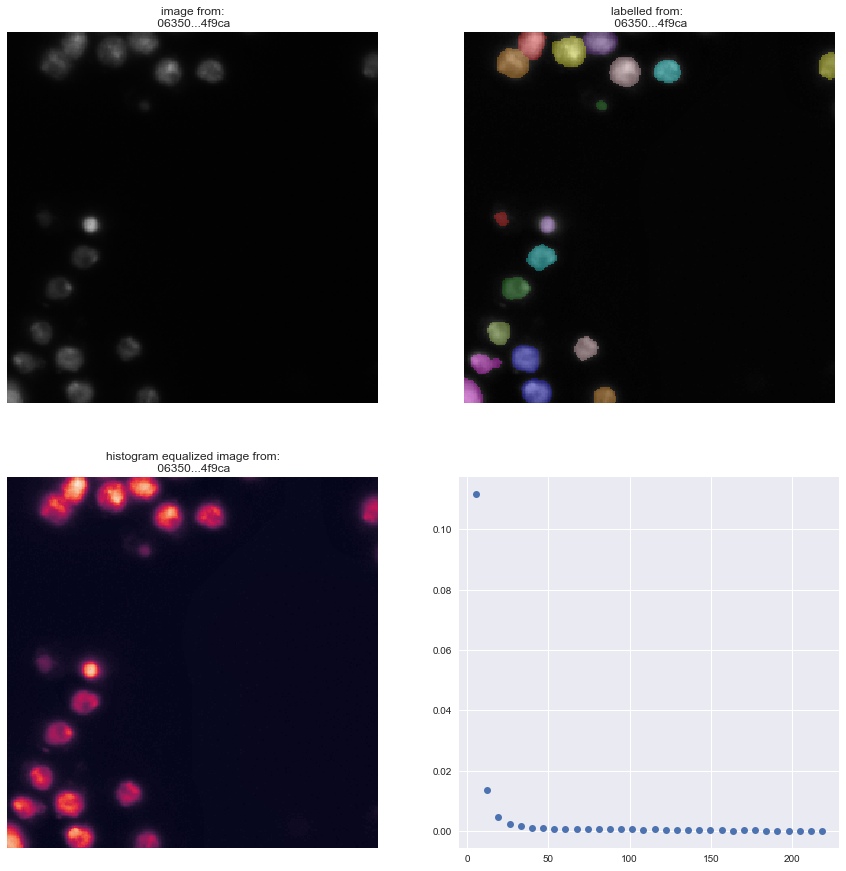

In [4]:
plt.figure(figsize=(15,15))
plt.subplot(221)
dataset.subdir[n].image.show()
plt.subplot(222)
dataset.subdir[n].show_labelled_nuclei()
plt.subplot(223)
dataset.subdir[n].image.show(eq=True)
plt.subplot(224)
hist, bin_edges, is_inverted = dataset.subdir[n].image.hist_c(use_eq_img=True)
plt.plot((bin_edges[:-1]+bin_edges[1:])/2, hist, 'o')
#plt.yscale('symlog')
plt.show()


## Find level of gray 'inverted' pictures
Most pictures seem to have bright nuclei but some have dark ones on brighter background.
To identify the latter, we use a simple criteria: if the integral of the first half of the corrected histogram is smaller than the for the second half, we consider it 'inverted'.
We use the histogram correction as way to make the images more consistent with each others.

We look for examples here


In [5]:
cnt=-1
for this_subdir in dataset.subdir:
    cnt+=1
    hist_c, bin_edges, is_inverted = this_subdir.image.hist_c()


In [6]:
are_inverted = [x.image.is_inverted for x in dataset.subdir]
inverted = mfind(are_inverted, lambda x: x==True)
non_inverted = mfind(are_inverted, lambda x: x==False)


## Displaying non inverted images
According to the histogram criteria

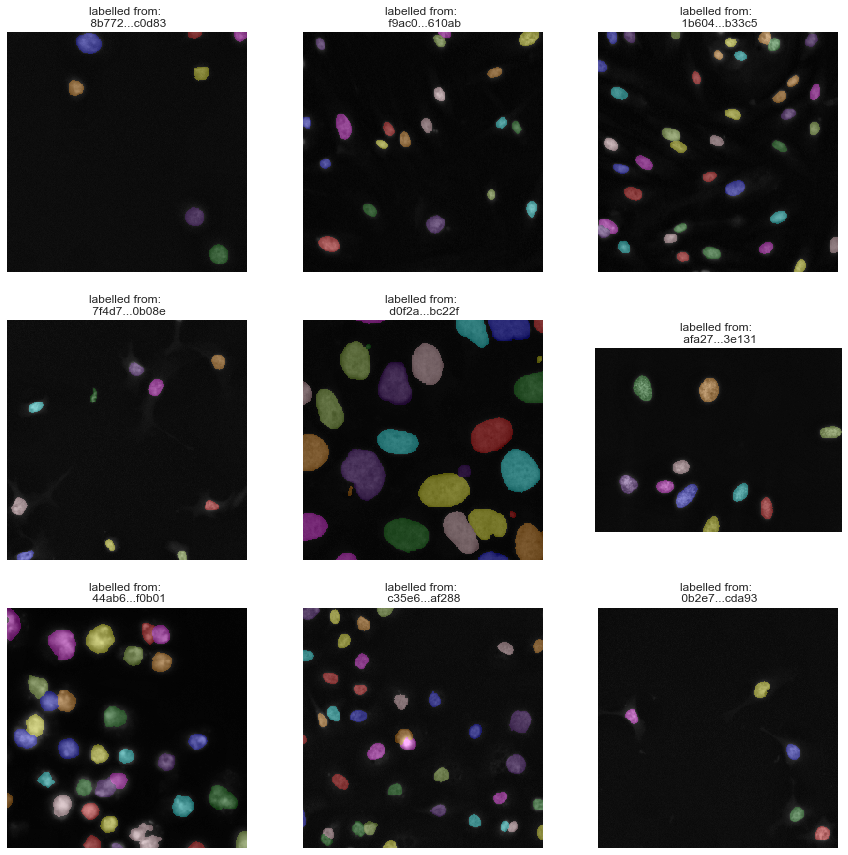

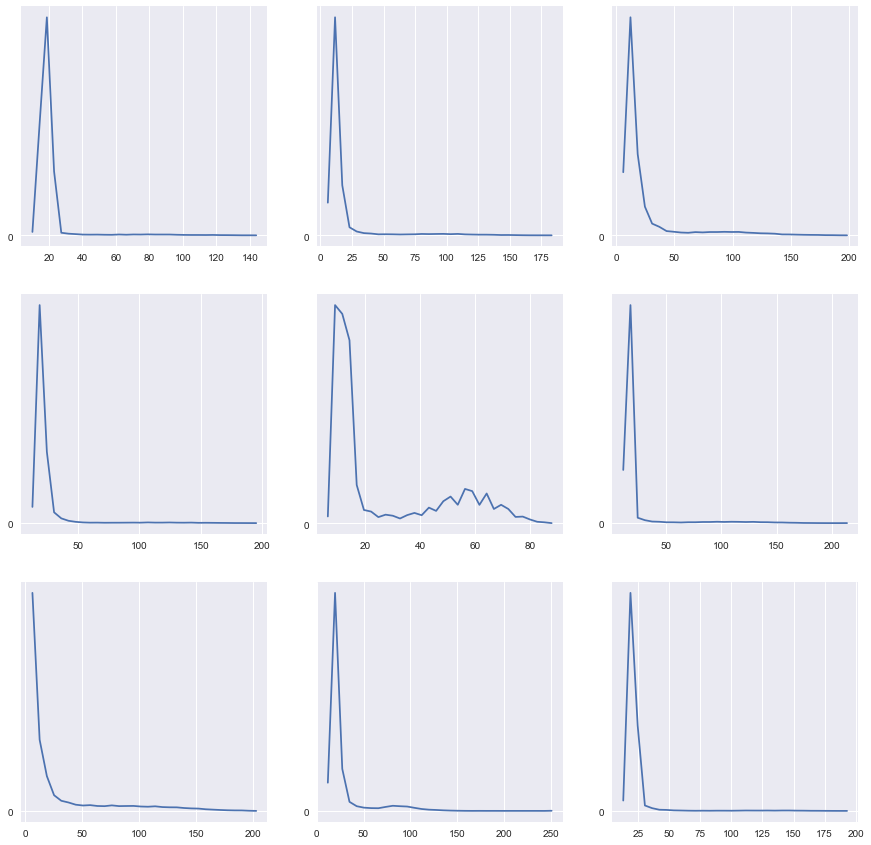

In [7]:
n_vec = random.sample(non_inverted,9)

plt.figure(figsize=(15,15))
cnt=0
for n in n_vec:
    cnt+=1
    plt.subplot(330+cnt)
    dataset.subdir[n].show_labelled_nuclei()
plt.show()

plt.figure(figsize=(15,15))
cnt=0
for n in n_vec:
    cnt+=1
    plt.subplot(330+cnt)
    hist, bin_edges, is_inverted = dataset.subdir[n].image.hist_c(use_eq_img=True)
    plt.plot((bin_edges[:-1]+bin_edges[1:])/2, hist, '-')
    plt.yscale('symlog')
plt.show()


## Displaying inverted images


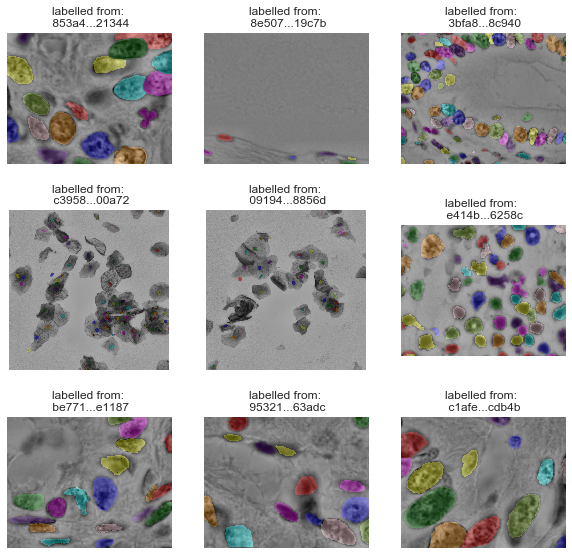

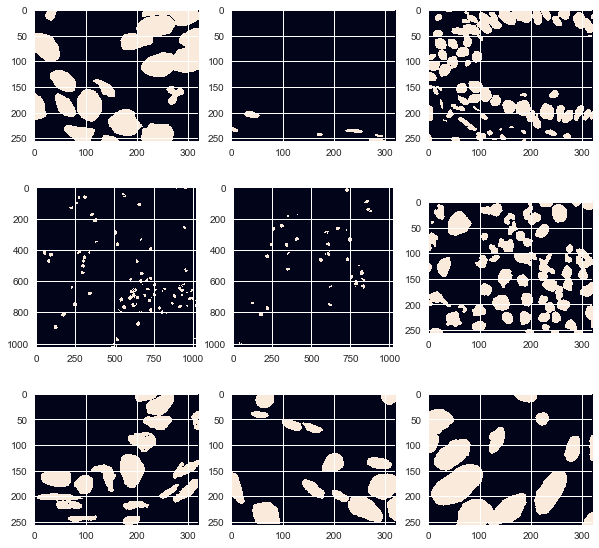

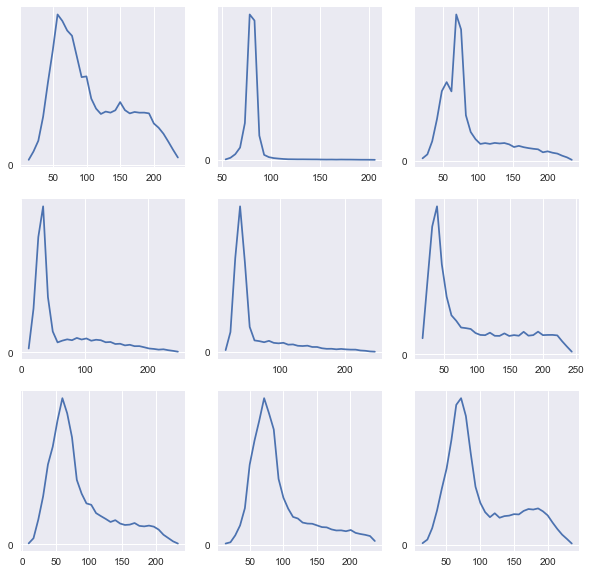

In [8]:
n_vec = random.sample(inverted,9)

plt.figure(figsize=(10,10))
cnt=0
for n in n_vec:
    cnt+=1
    plt.subplot(330+cnt)
    dataset.subdir[n].show_labelled_nuclei()
plt.show()

plt.figure(figsize=(10,10))
cnt=0
for n in n_vec:
    cnt+=1
    plt.subplot(330+cnt)
    plt.imshow(dataset.subdir[n].combined_masks)
plt.show()

plt.figure(figsize=(10,10))
cnt=0
for n in n_vec:
    cnt+=1
    plt.subplot(330+cnt)
    hist, bin_edges, is_inverted = dataset.subdir[n].image.hist_c(use_eq_img=True)
    plt.plot((bin_edges[:-1]+bin_edges[1:])/2, hist, '-')
    plt.yscale('symlog')
plt.show()

In [10]:
dir(dataset.subdir[n].nucleus[0].cc_props)


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_cache_active',
 '_intensity_image',
 '_intensity_image_double',
 '_label_image',
 '_ndim',
 '_slice',
 'area',
 'bbox',
 'bbox_area',
 'centroid',
 'convex_area',
 'convex_image',
 'coords',
 'eccentricity',
 'equivalent_diameter',
 'euler_number',
 'extent',
 'filled_area',
 'filled_image',
 'image',
 'inertia_tensor',
 'inertia_tensor_eigvals',
 'intensity_image',
 'label',
 'local_centroid',
 'major_axis_length',
 'max_intensity',
 'mean_intensity',
 'min_intensity',
 'minor_axis_length',
 'moments',
 'moments_central',
 'moments_hu',
 'moments_normalized',
 'orientation',
 'perimeter',
 'solidity',

In [11]:
data_dict = {
        'subdir': [],
        'nucleus': [],
        'area': [],
        'eccentricity': [],
        'solidity': [],
        'mean_intensity':[],
    }

In [12]:
for n_subdir in range(len(dataset.subdir)):
    if n_subdir % 50 ==0:
        print(n_subdir)
    for n_nucleus, nucleus in enumerate(dataset.subdir[n_subdir].nucleus):
        data_dict['subdir'] = n_subdir
        data_dict['nucleus'] = n_nucleus
        for prop in ['area', 'eccentricity', 'solidity', 'mean_intensity']:
            data_dict[prop].append(nucleus.cc_props.__getattribute__(prop))


0


50


100


150


200


250


300


350


400


450


500


550


600


650


/Users/jonathansaragosti/miniconda3/envs/sciencebowl/lib/python3.5/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)


No handles with labels found to put in legend.


No handles with labels found to put in legend.


No handles with labels found to put in legend.


No handles with labels found to put in legend.


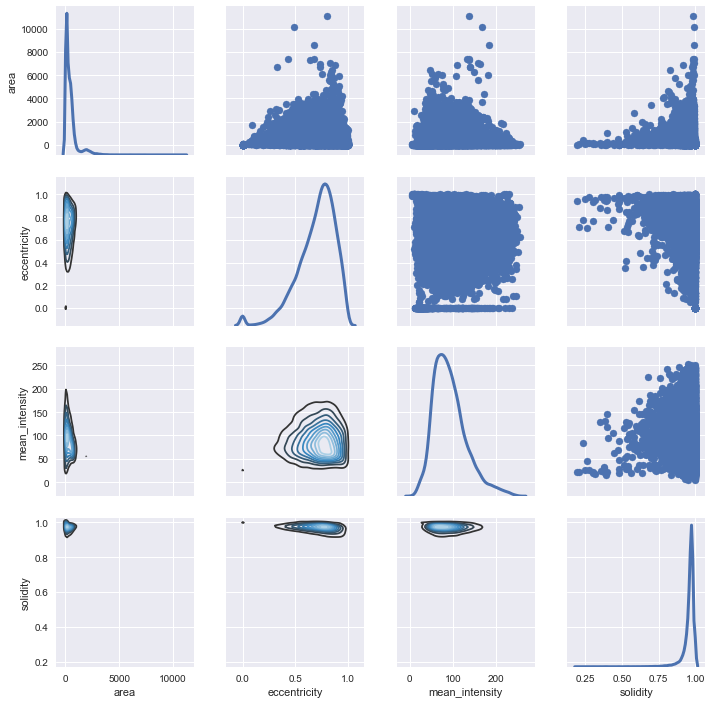

In [15]:
my_df = pd.DataFrame(data={k:data_dict[k] for k in ('area','eccentricity','solidity','mean_intensity') if k in data_dict})
g = sns.PairGrid(my_df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)
plt.show()


In [ ]:
my_df = pd.DataFrame(data={k:data_dict[k] for k in ('area', 'solidity') if k in data_dict})
g = sns.PairGrid(my_df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter, s=0.5)
g.map_diag(sns.kdeplot, lw=3)
plt.show()


255
62016 5 62270 10 62524 15 62780 16 63035 17 63291 18 63546 20 63802 20 64058 20 64313 21 64568 22 64824 22 65080 22 65336 19


'5cc036b65f7f2d5480e2be111a561f3713ac021683a9a9138dc49492a29ce856'

In [46]:
def rle_encoding(x,true_val=255):
    '''
    x: numpy array of shape (height, width), 1 - mask, 0 - background
    Returns run length as list
    '''
    dots = np.where(x.T.flatten() == true_val)[0]  # .T sets Fortran order down-then-right
    run_lengths = []
    prev = -2
    for b in dots:
        if (b > prev + 1): run_lengths.extend((b + 1, 0))
        run_lengths[-1] += 1
        prev = b
    return ' '.join(str(x) for x in run_lengths)
   

print(max(dataset.subdir[0].nucleus[0].bin_img().flatten()))

print(rle_encoding(dataset.subdir[0].nucleus[1].bin_img()))

dataset.subdir[0].image.name.strip('.png')

255
62016 5 62270 10 62524 15 62780 16 63035 17 63291 18 63546 20 63802 20 64058 20 64313 21 64568 22 64824 22 65080 22 65336 19


'5cc036b65f7f2d5480e2be111a561f3713ac021683a9a9138dc49492a29ce856'




## Trying 'simple' segmentation


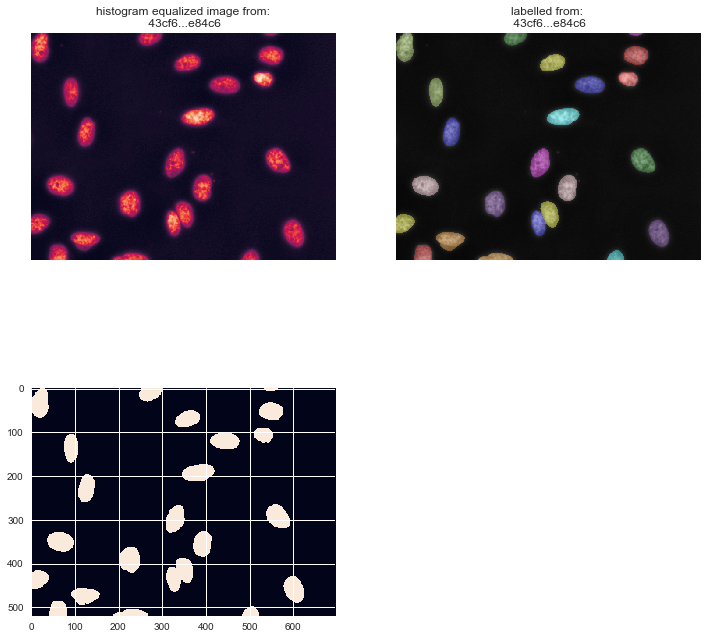

In [ ]:
from skimage.filters import threshold_otsu, threshold_local
from skimage.measure import label, regionprops
#def intersect_over_union()
n = random.choice(range(len(dataset.subdir)))


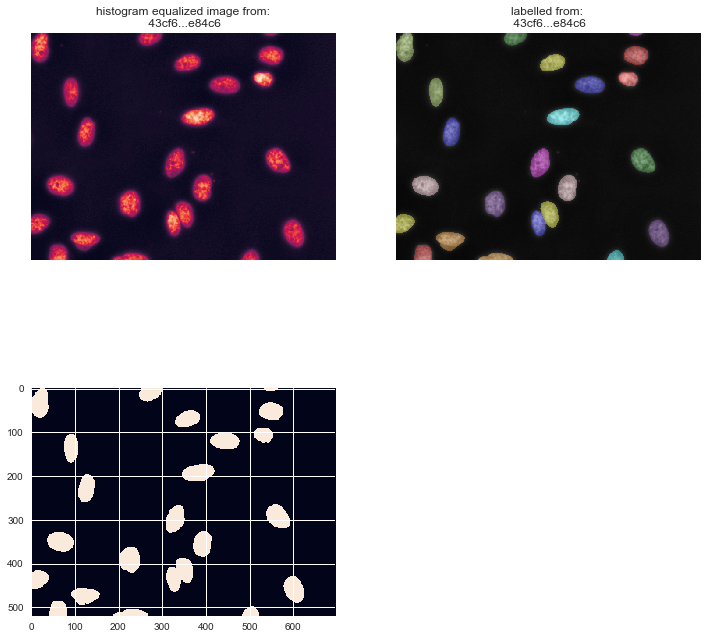

In [132]:
thresh = threshold_otsu(dataset.subdir[n].image.eq_img())
binary = dataset.subdir[n].image.eq_img() >= thresh
binary=binary.astype(int)
#block_size = 501
#adaptive_thresh = threshold_local(dataset.subdir[n].image.eq_img(), block_size, offset=1)
#binary_adaptive = dataset.subdir[n].image.eq_img() <= adaptive_thresh

plt.figure(figsize=(12,12))
plt.subplot(221)
dataset.subdir[n].image.show(eq=True)
plt.subplot(222)
dataset.subdir[n].show_labelled_nuclei()
plt.subplot(223)
plt.imshow(binary)
#plt.subplot(224)
#plt.imshow(1-binary_adaptive)
plt.show()


In [155]:

label_img = label(binary, connectivity=2)
print(set(label_img.flatten()))
props = regionprops(label_img.astype(int))#, intensity_image=dataset.subdir[n].image.eq_img())[0]
plt.imshow(label_img)
plt.show()

22


In [158]:
print(len(props))
#plt.imshow(props.image)
#plt.show()

22


In [115]:
binary.shape
print(520*696)
print(38434+323486)

22


In [ ]:

plt.imshow(binary.astype(int))
plt.show()


22


In [9]:
plt.figure(figsize=(10,10))
cnt=0
for n in n_vec:
    cnt+=1
    plt.subplot(330+cnt)
    hist, bin_edges, is_inverted = dataset.subdir[n].image.hist_c(use_eq_img=True)
    plt.plot((bin_edges[:-1]+bin_edges[1:])/2, hist, '-')
    plt.yscale('symlog')
plt.show()

NameError: name 'n_vec' is not defined

In [ ]:

binary_map = (1-binary > 0).astype(np.uint8)
connectivity = 4 # or whatever you prefer
plt.imshow(binary_map)
plt.show()
nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_map, connectivity, cv2.CV_32S)
centroids


NameError: name 'n_vec' is not defined

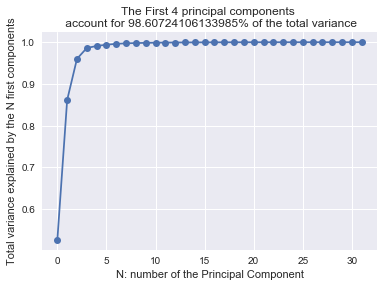

[0.52625279 0.33521357 0.09870327 0.02590279]


In [11]:
# perform PCA 
n_components = 4
pca = PCA()
pca.fit(hist_a)
plt.plot(np.cumsum(pca.explained_variance_ratio_), '-o')
plt.xlabel('N: number of the Principal Component')
plt.ylabel('Total variance explained by the N first components')
plt.title('The First {} principal components \n'
          ' account for {}% of the total variance'.format(
    n_components,100*np.sum(pca.explained_variance_ratio_[0:n_components])))
plt.show()
print(pca.explained_variance_ratio_[0:n_components])

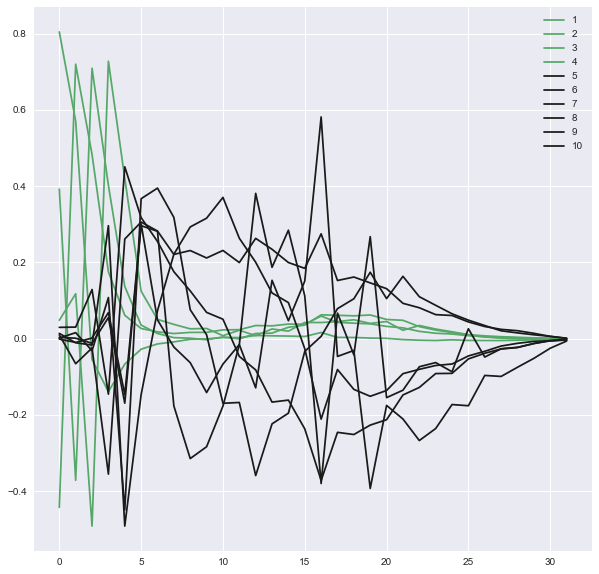

In [12]:
# display first few Principal components
fig = plt.figure(figsize=(10, 10))
cmpnt = 0
for component in pca.components_[:10]:
    cmpnt += 1
    if cmpnt<=n_components:
        plt.plot(component, color='g', label=str(cmpnt),)
    else:
        plt.plot(component, color='k', label=str(cmpnt),)
plt.legend()
plt.show()    

In [10]:
# display the first three components on a 3D scatter plot
hist_a_t = pca.transform(hist_a)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(hist_a_t[:,0],hist_a_t[:,1],hist_a_t[:,2])
plt.show()


<IPython.core.display.Javascript object>

<div id='5a847d97-0a7b-4a14-b1c2-f999485b5338'></div>

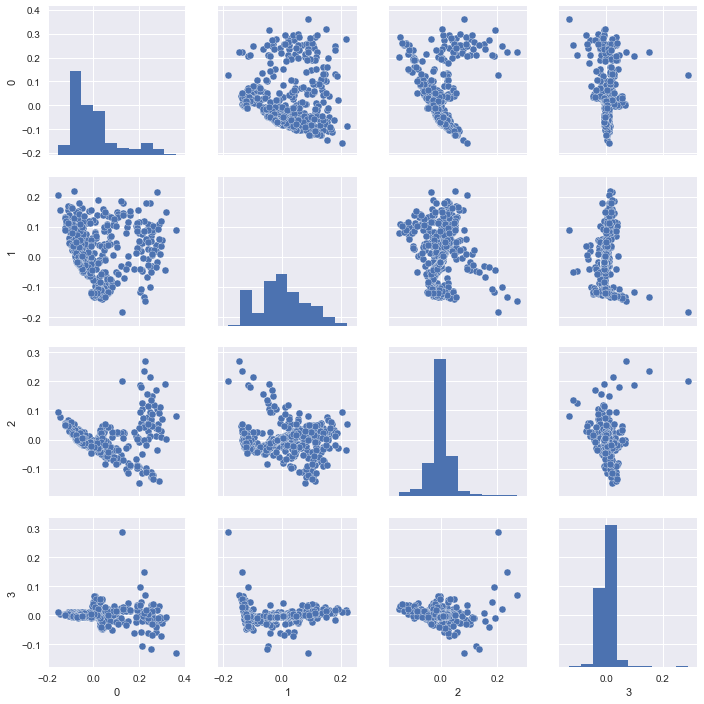

In [11]:
my_df = pd.DataFrame(data=hist_a_t[:,:n_components])
g = sns.pairplot(my_df)
plt.show()

In [24]:
# all data directories contain only one image in the 'images' subdirectory. Get the number of nuclei for each pic
N_nuclei = []
for this_dir in sub_dirs:
    this_path = stage1_train_path + this_dir +'/images/'
    if os.path.isdir(this_path):
        if len(os.listdir(stage1_train_path + this_dir +'/images/')) > 1:
            print('the directory {} contain more than one image in /images/'.format(this_dir))
        N_nuclei.append(len(os.listdir(stage1_train_path + this_dir +'/masks/')))    

In [31]:
print('there is between {} and {} nuclei per pic'.format(np.min(N_nuclei),np.max(N_nuclei)))

there is between 1 and 375 nuclei per pic


In [32]:
print('average number is {}, median is {} and  standard deviation is {}'.format(np.mean(N_nuclei), np.median(N_nuclei), np.std(N_nuclei)))

average number is 43.971641791044775, median is 27.0 and  standard deviation is 47.926723626835056


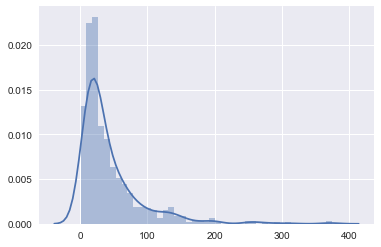

total number of nuclei: 29461


In [46]:
sns.distplot(N_nuclei)
plt.show()
print('total number of nuclei: {}'.format(np.sum(N_nuclei)))

In [99]:
# figure ou the size distribution of the nuclei in pixels
N_nuclei_sizes = []
N_nuclei_fractions = []
min_size = 1000000
min_size_mask = ''
max_size = 0
max_size_mask = ''
for this_dir in sub_dirs:
    this_path = stage1_train_path + this_dir +'/masks/'
    if os.path.isdir(this_path):
        this_masks_dir = stage1_train_path + this_dir +'/masks/'
        for this_mask in os.listdir(this_masks_dir):
            this_mask_path = this_masks_dir + this_mask
            img = cv2.imread(this_mask_path, cv2.IMREAD_GRAYSCALE)
            this_nucleus_size = np.sum(img == 255)
            if this_nucleus_size > max_size:
                max_size = this_nucleus_size
                max_size_mask = this_mask_path
            if this_nucleus_size < min_size:
                min_size = this_nucleus_size
                min_size_mask = this_mask_path
            N_nuclei_sizes.append(this_nucleus_size)
            N_nuclei_fractions.append(this_nucleus_size/(img.shape[0]*img.shape[1]))

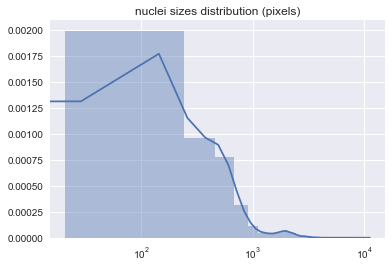

Text(0.5,1,'nuclei sizes distribution (pixels)')

In [165]:
ax = sns.distplot(N_nuclei_sizes)
ax.set_xscale('log')
plt.show()
plt.title('nuclei sizes distribution (pixels)')


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(Y)
pca_score = pca.explained_variance_ratio_
V = pca.components_

In [ ]:

sns.distplot(N_nuclei_fractions)
plt.show()
plt.title('nuclei fraction of image distribution (max: {}%)'.format())


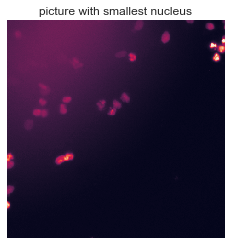

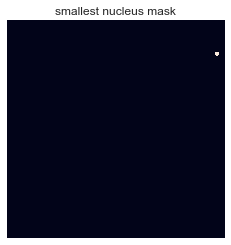

([], <a list of 0 Text yticklabel objects>)

In [96]:
# display the picture with the smallest nucleus
masks_path, trash = os.path.split(min_size_pic)
min_size_dir, trash = os.path.split(masks_path)
#print(min_size_dir)
# display picture
min_size_pic_path = min_size_dir+'/images/'+os.listdir(min_size_dir+'/images/')[0]
img = cv2.imread(min_size_pic_path, cv2.IMREAD_GRAYSCALE)
shape = img.shape
# open in finder
#call(["open", masks_path])

plt.imshow(img)
plt.title('picture with smallest nucleus')
plt.show()
plt.xticks([])
plt.yticks([])

bw = cv2.imread(min_size_pic, cv2.IMREAD_GRAYSCALE)
plt.imshow(bw)
plt.title('smallest nucleus mask')
plt.show()
plt.xticks([])
plt.yticks([])

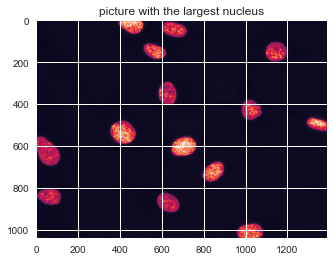

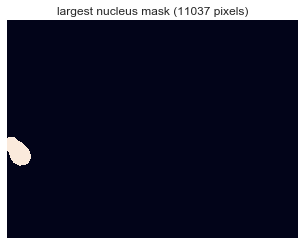

([], <a list of 0 Text yticklabel objects>)

In [103]:
# display the picture with the largest nucleus
masks_path, trash = os.path.split(max_size_pic)
max_size_dir, trash = os.path.split(masks_path)
#print(max_size_dir)
# display picture
max_size_pic_path = max_size_dir+'/images/'+os.listdir(max_size_dir+'/images/')[0]
img = cv2.imread(max_size_pic_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(img)
plt.title('picture with the largest nucleus')
# open in finder
#call(["open", masks_path])
plt.show()
plt.xticks([])
plt.yticks([])

bw = cv2.imread(max_size_pic, cv2.IMREAD_GRAYSCALE)
plt.imshow(bw)
plt.title('largest nucleus mask ({} pixels)'.format(max_size))
plt.show()
plt.xticks([])
plt.yticks([])

In [187]:
# MSER
img = cv2.imread(max_size_pic_path)
mser = cv2.MSER_create(_delta=1,_min_area=1500,_max_area=30000)
regions, _ = mser.detectRegions(img)
hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]
mask = np.zeros((img.shape[0], img.shape[1], 1), dtype=np.uint8)
for contour in hulls:
    cv2.drawContours(mask, [contour], -1, (255, 255, 255), -1)

mask.shape    

(1040, 1388, 1)

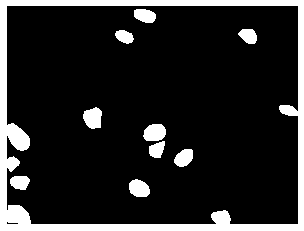

In [188]:
plt.imshow(np.squeeze(mask, axis=2), cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

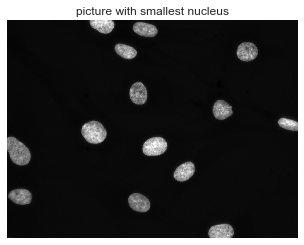

In [182]:
plt.imshow(img)
plt.title('picture with smallest nucleus')
plt.xticks([])
plt.yticks([])
plt.show()


In [179]:
print(max_size_pic_path)

/Users/jonathansaragosti/Documents/GitHub/Python/Kaggle/2018 Data Science Bowl/nuclei/data/stage1_train/c901794d1a421d52e5734500c0a2a8ca84651fb93b19cec2f411855e70cae339/images/c901794d1a421d52e5734500c0a2a8ca84651fb93b19cec2f411855e70cae339.png


In [16]:
len(np.random.rand(10))

10

In [22]:
x = np.arange(11)
x
half = int(np.floor(len(x)/2))
half
print(x[:half])
print(x[-half:])
print(x[::-1])

[0 1 2 3 4]
[ 6  7  8  9 10]
[10  9  8  7  6  5  4  3  2  1  0]


In [16]:
from skimage.feature import blob_dog, blob_log, blob_doh


NameError: name 'plot' is not defined